In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

plt.rcParams['figure.figsize'] = (10, 2)

Для разминки:
###  Задание 1

Посчитай направление наибольшего роста функции $f(x, y) = 3x^2 + y^2$ в точке $z_0 = (1, 3train_test_split

In [4]:
def func(x,y):
    return 3*x**2+y**2

def func2(x,y):
    return 2*x**3+y**3

x = torch.tensor(1., requires_grad=True)

y = torch.tensor(3., requires_grad=True)

result = func2(x, y)
result.backward()
print(x.grad, y.grad)

#

tensor(6.) tensor(27.)


###  Задание 2

Найди минимум функции $f(x, y) = 3x^2 + y^2$.

In [5]:
x = torch.tensor(1., requires_grad=True)
y = torch.tensor(3., requires_grad=True)

In [6]:
for _ in range(100):    
    result = func(x, y)
    result.backward()
    print(x.grad, y.grad)
    x.data -= x.grad*0.1
    y.data -= y.grad*0.1
    print(x, y, func(x,y))
    x.grad.data.zero_()
    y.grad.data.zero_()

tensor(6.) tensor(6.)
tensor(0.4000, requires_grad=True) tensor(2.4000, requires_grad=True) tensor(6.2400, grad_fn=<AddBackward0>)
tensor(2.4000) tensor(4.8000)
tensor(0.1600, requires_grad=True) tensor(1.9200, requires_grad=True) tensor(3.7632, grad_fn=<AddBackward0>)
tensor(0.9600) tensor(3.8400)
tensor(0.0640, requires_grad=True) tensor(1.5360, requires_grad=True) tensor(2.3716, grad_fn=<AddBackward0>)
tensor(0.3840) tensor(3.0720)
tensor(0.0256, requires_grad=True) tensor(1.2288, requires_grad=True) tensor(1.5119, grad_fn=<AddBackward0>)
tensor(0.1536) tensor(2.4576)
tensor(0.0102, requires_grad=True) tensor(0.9830, requires_grad=True) tensor(0.9667, grad_fn=<AddBackward0>)
tensor(0.0614) tensor(1.9661)
tensor(0.0041, requires_grad=True) tensor(0.7864, requires_grad=True) tensor(0.6185, grad_fn=<AddBackward0>)
tensor(0.0246) tensor(1.5729)
tensor(0.0016, requires_grad=True) tensor(0.6291, requires_grad=True) tensor(0.3958, grad_fn=<AddBackward0>)
tensor(0.0098) tensor(1.2583)
tenso

## Высокоуровневый PyTorch

В этом ноутбуке мы не будем вручную создавать переменные и вручную считать производные. В торче есть много абстракций и инструментов, которые облегчают жизнь (хоть и вручную можно создать что угодно)

Самая главная из них это nn.Module.Посмотрим на его документацию:

In [7]:
from torch import nn
import torch.nn.functional as F

print(nn.Module.__doc__)

Base class for all neural network modules.

    Your models should also subclass this class.

    Modules can also contain other Modules, allowing to nest them in
    a tree structure. You can assign the submodules as regular attributes::

        import torch.nn as nn
        import torch.nn.functional as F

        class Model(nn.Module):
            def __init__(self):
                super().__init__()
                self.conv1 = nn.Conv2d(1, 20, 5)
                self.conv2 = nn.Conv2d(20, 20, 5)

            def forward(self, x):
                x = F.relu(self.conv1(x))
                return F.relu(self.conv2(x))

    Submodules assigned in this way will be registered, and will have their
    parameters converted too when you call :meth:`to`, etc.

    .. note::
        As per the example above, an ``__init__()`` call to the parent class
        must be made before assignment on the child.

    :ivar training: Boolean represents whether this module is in training or
         

Для удобства сделано, что все архитектуры ("модули") написанные вами на pytorch-e должны быть отнаследованы от nn.Module.

Каждый модуль -- это нечто, что принимает на вход какие-то тензоры, и возвращает какие-то тензоры. Это как раз forward pass -- его и нужно описывать в методе `forward`. В примере выше описана нейросеть, в которой два слоя (self.conv1 и self.conv2). В forward() описана логика того, как должен быть предобработан входной тензор `x`. 
В примере выше сначала применяется первый слой, потом функция активации, потом второй слой, а потом еще раз функция активации.

Многие классы из torch.nn являются наследниками `nn.Module`-я -- их и рекомендуется использовать в качестве "строительных блоков" вашей нейросети.

#### nn.Module

In [8]:
class Block(nn.Module):
    def __init__(self):
        super().__init__()  # не стоит забывать так писать
        self.linear_first = nn.Linear(64, 64)
        self.activation = nn.ReLU()
        self.linear_second = nn.Linear(64, 1)
    
    def forward(self, inp: torch.Tensor) -> torch.Tensor:
        result = self.linear_first(inp)
        result = self.activation(result)
        result = self.linear_second(result)
        result = self.activation(result) 
        return result

In [9]:
block = Block()

In [10]:
inp = torch.ones(100, 64) 

In [11]:
# nn.Module-и можно вызывать прямо так, и под капотом будет вызвано то, что реализовано в методе .forward()
block(inp)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [12]:
block(inp).shape

torch.Size([100, 1])

Рассмотрим другой способ создать ту же самую нейросеть с помощью строительного блока `nn.Sequential`. Он сделан для того, чтобы применять подряд другие блоки, например:

In [13]:
block_seq = nn.Sequential(
    nn.Linear(64, 64),  # линейный слой 64 признака в 64 признака
    nn.ReLU(),  # функция активации
    nn.Linear(64, 1),  # линейный слой 64 признака в 1 признак
    nn.ReLU(),  #  еще одна функция активации
)

In [14]:
block_seq(inp)

tensor([[0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0.1118],
        [0

In [15]:
block_seq(inp).shape

torch.Size([100, 1])

In [16]:
torch.allclose(block(inp), block_seq(inp))

False

**Почему в последней ячейке вывелось False?**. Веса нейронной сети для хорошей оптимизации обычно инициализируют рандомно, причем инициализация должна быть *правильной*.
В торче стратегии инициализации весов уже реализованы за вас, и если объявлять модули, то веса модуля уже будут рандомно инициализированы. Так как они рандомно инициализированы, то и выход двух заново созданных модулей (`block` и `block_seq`) будет разным.

#### Optimizers

In [17]:
from torch.optim import SGD
from torch.optim import Adam

В pytorch так же есть реализации наиболее известных оптимизаторов -- например, стохастический градиентный спуск.
Чтобы инициализировать почти любой оптимизатор, ему нужно передать список из тензоров (или словарей тензоров), которые нужно оптимизировать.
Чтобы получить веса nn.Module нужно вызвать у него метод parameters()
Так, чтобы оптимизировать веса `block`-а, подойдет например вот такой оптимизатор:

In [18]:
optimizer = SGD(block.parameters(), lr=0.05)
optimizer1 = Adam(block.parameters(), lr=0.05)
#  сюда мы так же передали lr -- наш learning-rate

In [19]:
list(block.named_parameters())

[('linear_first.weight',
  Parameter containing:
  tensor([[-0.0976,  0.1048,  0.0307,  ...,  0.0450, -0.1108, -0.1220],
          [ 0.1033, -0.0756,  0.0891,  ..., -0.0987,  0.0437,  0.1142],
          [ 0.1087, -0.1066, -0.0709,  ..., -0.1084, -0.0075,  0.0911],
          ...,
          [ 0.0504,  0.0190, -0.0433,  ..., -0.1018, -0.1243,  0.0382],
          [-0.0776,  0.0034,  0.0421,  ...,  0.0346, -0.0780, -0.0010],
          [-0.0161, -0.0373,  0.0353,  ...,  0.1208, -0.0905,  0.1169]],
         requires_grad=True)),
 ('linear_first.bias',
  Parameter containing:
  tensor([ 0.0462, -0.0991,  0.0340, -0.0923,  0.0256, -0.0233, -0.0558, -0.0358,
           0.0645,  0.0598,  0.1152,  0.0360,  0.0945, -0.0561, -0.0071,  0.0733,
          -0.1237, -0.1072,  0.0006, -0.0820,  0.1008,  0.0500,  0.0377, -0.1071,
          -0.0875, -0.0605,  0.0227,  0.0350, -0.0115, -0.0486, -0.0513, -0.0974,
           0.0626, -0.0455,  0.0537,  0.0352, -0.0813,  0.0348,  0.0484,  0.0910,
           0.07

In [20]:
optimizer1

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.05
    maximize: False
    weight_decay: 0
)

Теперь нам хватает знаний, чтобы закодить логистическую регрессию, которая отличает букву A на картинке от буквы B

In [21]:
# если клетка падает, то просто перезапусти
from notmnist import load_notmnist


X_train, y_train, X_test, y_test = load_notmnist(letters='AB')
X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])

print(f"Train size  = {len(X_train):11}, test_size  = {len(X_test)}")
print(f"Train shape = {X_train.shape}, test_shape = {X_test.shape:}")

Parsing...
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if &lt;10 images are broken]
Done
Train size  =        2808, test_size  = 937
Train shape = (2808, 784), test_shape = (937, 784)


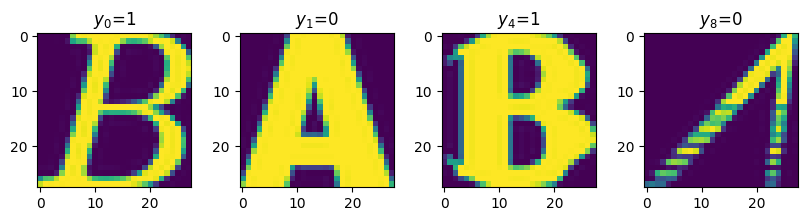

In [22]:
indeces = [0, 1, 4, 8]
for i, ind in enumerate(indeces):
    plt.subplot(1, len(indeces), i + 1)
    plt.imshow(X_train[ind].reshape([28, 28]))
    plt.title(f'$y_{ind}$=' + str(y_train[ind]))

In [23]:
model = nn.Sequential(
    nn.Linear(784, 1),  # на вход картинки 28 на 28 -- ровно 784 значения
    nn.Sigmoid(),  # на выход числа от 0 до 1, где 1 -- вероятность того, что на картинке B
)

Посмотрим на параметры модели:

In [24]:
print("Weight shapes:", [w.shape for w in model.parameters()])

Weight shapes: [torch.Size([1, 784]), torch.Size([1])]


In [25]:
# тензор размера 3 на 784 -- ровно три первых картинки из тренировочной выборки
x = torch.tensor(X_train[:3], dtype=torch.float32)

# тензор размера 3 -- ровно три первых ответа из тренировочной выборки
y = torch.tensor(y_train[:3], dtype=torch.float32)

# то, что предсказывает необученная модель
y_predicted = model(x)[:, 0]

y_predicted

tensor([0.4420, 0.5629, 0.5607], grad_fn=<SelectBackward0>)

Для обучения необходимо вычислить функцию ошибки. В данном случае подходит лог-лосс, или бинарная кросс-энтропия. Вы реализовали ровно в одной из функций из начала этой тетрадки :) Воспользуйтесь ей, чтобы посчитать лосс

In [26]:
# <YOUR-CODE-HERE>
def log_loss(predicted_probas, y_true): 
    return -torch.mean(torch.log(torch.abs(predicted_probas-(1-y_true))))

loss = log_loss(y_predicted, y)
loss

tensor(0.8222, grad_fn=<NegBackward0>)

In [27]:
assert tuple(loss.size()) == tuple(), "Лосс должен быть скаляром"
assert loss.data.numpy() > 0, "лог лосс должен быть больше нуля, ноль -- только для идеального предсказания"
assert loss.data.numpy() <= np.log(3), "Лосс слишком большой для нетренированной модели. Пожалуйста, перепроверьте его"

In [28]:
optimizer = SGD(model.parameters(), lr=0.05)  # создаем оптимизатор
#  теперь как им пользоваться:

In [29]:
loss = log_loss(y_predicted, y)  # посчитали значение (скаляр), которое хотим минимизировать
loss.backward()  # теперь у каждой переменной, где require_grad=True, есть градиент (производная). Для всех параметров нашего модуля это выполнено
optimizer.step()  # делаем шаг градиентного спуска
optimizer.zero_grad()  # очищаем параметры от уже посчитанных градиентов, чтобы те не мешали нам на следующих шагах

# и да, это надо делать в цикле, который называется training_loop

In [30]:
from typing import Iterator, Tuple
from tqdm.auto import trange


def iterate_minibatches(inputs: np.ndarray, targets: np.ndarray, batch_size: int, shuffle: bool = False) \
        -> Iterator[Tuple[np.ndarray]]:
    """
    Проходимся по датасету мини-батчами 
    """
    assert len(inputs) == len(targets)
    
    if shuffle:
        indices = np.random.permutation(len(inputs))
    
    for start_idx in range(0, len(inputs), batch_size):
        if shuffle:
            excerpt = indices[start_idx: start_idx + batch_size]
        else:
            excerpt = slice(start_idx, start_idx + batch_size)
        
        yield inputs[excerpt], targets[excerpt]

#### Теперь всё вместе

In [31]:
model = nn.Sequential(
    nn.Linear(784, 128), # 784*64 + 64
    nn.LeakyReLU(),
    nn.Linear(128,128), # 64*32 + 32
    nn.LeakyReLU(),
    nn.Linear(128,64), # 64*32 + 32
    nn.LeakyReLU(),
    nn.Linear(64,1), # 32*1 + 1
    nn.Sigmoid()
)
optimizer = Adam(model.parameters(), lr=0.000075)

In [32]:
from tqdm.notebook import tqdm

In [33]:
for epoch in tqdm(range(120)):    
    history = []

    # итерируемся по мини-батчам в цикле
    for X_batch, y_batch in iterate_minibatches(X_train, y_train, 64):

        # предскажи вероятности
        y_predicted = model(torch.tensor(X_batch))[:,0]

        assert y_predicted.dim() == 1, "вы забыли второе измерение с помощью [:, 0]"

        # посчитай лосс
        loss = log_loss(y_predicted, torch.tensor(y_batch))
        history.append(loss.detach().numpy())

        # посчитай градиенты
        loss.backward()

        # шаг градиентного спуска
        optimizer.step()


        # чистим градиенты
        optimizer.zero_grad()

        # if i % 5 == 0:
            # print("step #%i | mean loss = %.3f" % (i, np.mean(history[-10:])))

  0%|          | 0/120 [00:00<?, ?it/s]

In [34]:
history[-1]

array(1.3057136e-05, dtype=float32)

Тестируем:

In [35]:
# посчитай качество на валидационной выборке
def accuracy(predictions: torch.Tensor, targets: torch.Tensor, threshold: float = 0.5):
    """точность предсказаний - доля верных ответов"""
    ### <YOUR CODE HERE> ###
    arr = (predictions>threshold) == targets
    return torch.sum(arr)/arr.shape[0]

predictions = torch.empty(len(X_test))
for i, x in enumerate(X_test):
    x_tensor = torch.tensor(x)
    predictions[i] = model(x_tensor.reshape(1, len(x_tensor)))
    
y_test_tensor = torch.tensor(y_test)
acc = accuracy(predictions, y_test_tensor, 0.5)


print("Test accuracy: %.5f" % acc)
assert acc > 0.94, "попробуй потренировать подольше"

Test accuracy: 0.97759


## Бонус 1

Попробуй добиться того, чтобы accuracy на тестовой выборке стала больше чем 0.96 (для этого можно модицифировать архитектуру нейросети, менять параметры выше). Копипастить из этой же тетрадки или других можно :)

## Бонус 2. MLP + регрессия

Попробуй построить нейросеть, которая решает задачу регрессии для датасета House Prices.

In [69]:
import random

In [70]:
def mse_loss(y_predicted, y_true):
    return torch.mean(torch.pow(y_predicted-y_true, 2))
def rmse(y_pred, y_true):
    return torch.square(torch.mean(torch.pow(y_true-y_pred, 2)))

In [73]:
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques
features = ['LotArea', 'TotalBsmtSF', 'GrLivArea', '1stFlrSF', '2ndFlrSF']
data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')[features + ['SalePrice']]

# train, valid = train_test_split(data, test_size=0.33, random_state=42)

# X_train = train[features].values
# y_train = train['SalePrice'].values[..., np.newaxis]

# X_valid = valid[features].values
# y_valid = valid['SalePrice'].values[..., np.newaxis]
x_train_ind = list(range(len(data)))
X_train, y = data.drop(columns=['SalePrice']).values, data['SalePrice'].values[..., np.newaxis]

random.seed(123)
random.shuffle(x_train_ind)
X_train = X_train[x_train_ind]
y_train = y[x_train_ind]

num_train_train = int(len(X_train)*0.8)

x_train_train = X_train[:num_train_train]
y_train_train = y_train[:num_train_train]

y_train_test = y_train[int(len(X_train)*0.8):]
x_train_test = X_train[int(len(X_train)*0.8):]

scaler = StandardScaler()

X_train = scaler.fit_transform(x_train_train)
X_valid = scaler.transform(x_train_test)

y_train_std = y_train_train.std()
y_train = y_train_train / y_train_std
y_valid = y_train_test / y_train_std

In [74]:
X_train.shape

(1168, 5)

In [85]:
model = nn.Sequential(
    nn.Linear(5, 5),
    nn.LeakyReLU(),
    nn.Linear(5, 5),
    nn.LeakyReLU(),
    nn.Linear(5, 5),
    nn.LeakyReLU(),
    nn.Linear(5, 1),
    
)
optimizer = SGD(model.parameters(), lr=0.001)

In [86]:
for epoch in tqdm(range(600)):    
    history = []
    for X_batch, y_batch in iterate_minibatches(X_train, y_train, 64):
    # for X, y in zip(X_train, y_train):
        y_predicted = model(torch.tensor(X_batch).to(torch.float32))
        loss = mse_loss(y_predicted, torch.tensor(y_batch))
        history.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

  0%|          | 0/600 [00:00<?, ?it/s]

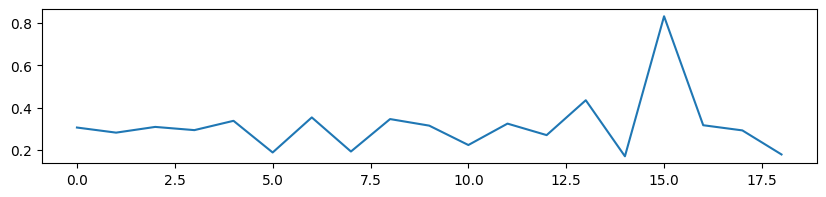

In [87]:
plt.plot(np.arange(len(history)), history)

In [88]:
y_pred = model(torch.tensor(X_valid).to(torch.float32))

In [89]:
print(rmse(y_pred, torch.tensor(y_valid)))

tensor(0.1405, dtype=torch.float64, grad_fn=<PowBackward0>)


In [67]:
y_pred

tensor([[1.7765],
        [4.0561],
        [1.6941],
        [2.2313],
        [3.1796],
        [1.3999],
        [2.6036],
        [1.8610],
        [1.4016],
        [2.0815],
        [1.9816],
        [1.5708],
        [1.7059],
        [2.9605],
        [2.3482],
        [1.6855],
        [2.4536],
        [1.7756],
        [1.6922],
        [2.7958],
        [2.5208],
        [2.2605],
        [2.0954],
        [1.5874],
        [2.6990],
        [2.0579],
        [2.4486],
        [1.6887],
        [2.3114],
        [2.4667],
        [1.4055],
        [2.9943],
        [4.1904],
        [1.6119],
        [3.1841],
        [1.8957],
        [2.7118],
        [2.7884],
        [3.8870],
        [1.3815],
        [1.4238],
        [2.7432],
        [1.6276],
        [3.8383],
        [1.6788],
        [3.0425],
        [1.5848],
        [1.6093],
        [3.8157],
        [2.2091],
        [1.5756],
        [3.0753],
        [1.4765],
        [3.7590],
        [1.5281],
        [3